# 주성분 분석(PCA / 차원 축소)
- 주성분 분석에서의 차원이란?  
차원 = 특성이라고 이해를 하면 된다

In [2]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

# n_components : 주성분의 갯수 설정
pca = PCA(n_components= 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
pca.components_.shape

(50, 10000)

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

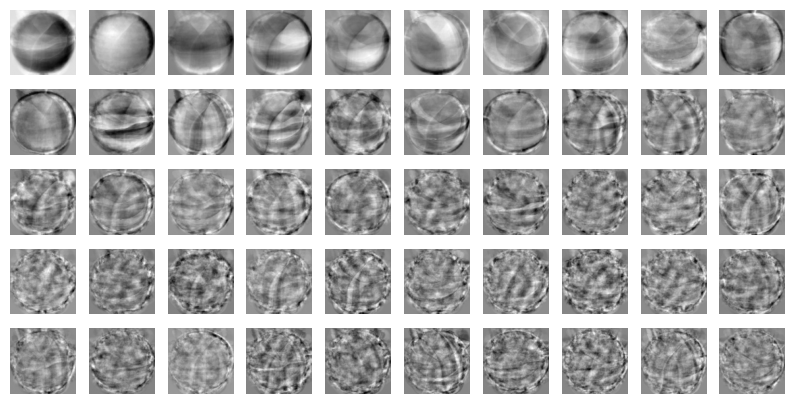

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

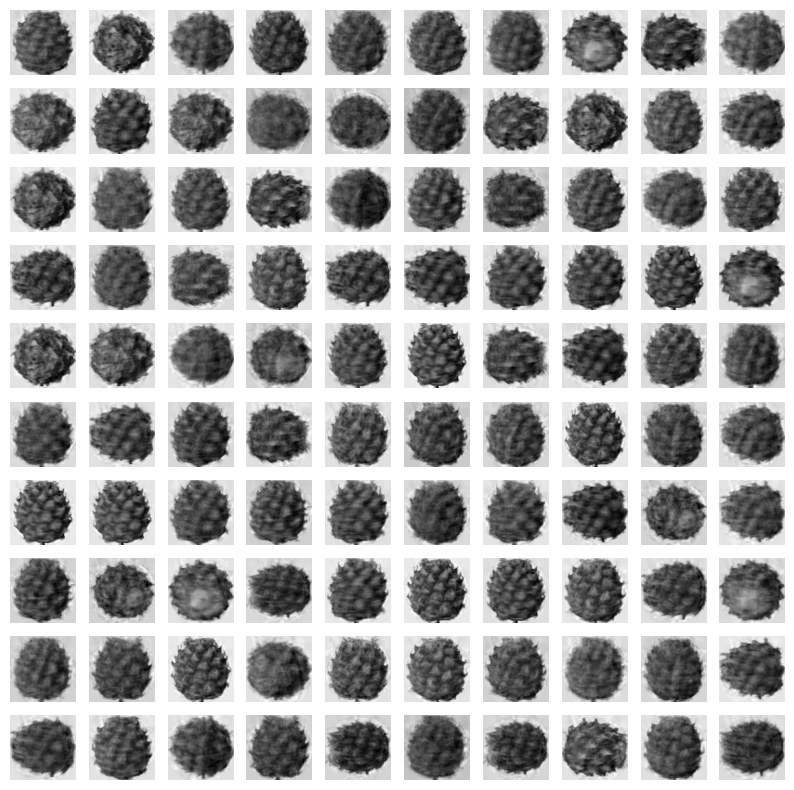

In [12]:
# 원상복구
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[100:200])

In [14]:
# explained_variance_ratio_: 각각의 픽셀들이 얼마만큼의 역할을 하고 있는가 설명을 해준다
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486383, 0.00480347,
       0.00447835, 0.00437313, 0.00408022, 0.00389471, 0.0037243 ,
       0.0035928 , 0.00331455, 0.00317786, 0.00304329, 0.00303755,
       0.00288823, 0.00275573, 0.00264818, 0.00255734, 0.00251754,
       0.00247113, 0.00239514, 0.00230523, 0.0022162 , 0.00215914,
       0.00213934, 0.00195443, 0.00192459, 0.00190731, 0.0018492 ,
       0.00178627, 0.00172648, 0.00166662, 0.00161119, 0.00159594])

In [15]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9214522347671262)

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]* 100 + [1]*100 + [2]*100)

In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(scores)

{'fit_time': array([0.11795974, 0.10280538, 0.10307503, 0.10150099, 0.10529995]), 'score_time': array([0.00143123, 0.00103569, 0.00117087, 0.00112891, 0.00120187]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00349307, 0.00383902, 0.00266218, 0.00390673, 0.00557399]), 'score_time': array([0.00036097, 0.00045705, 0.00032091, 0.00035501, 0.00030518]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [20]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.01305699, 0.00615287, 0.00857401, 0.00764132, 0.00756788]), 'score_time': array([0.00042081, 0.00034118, 0.00043583, 0.00052571, 0.00030708]), 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}


/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [23]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

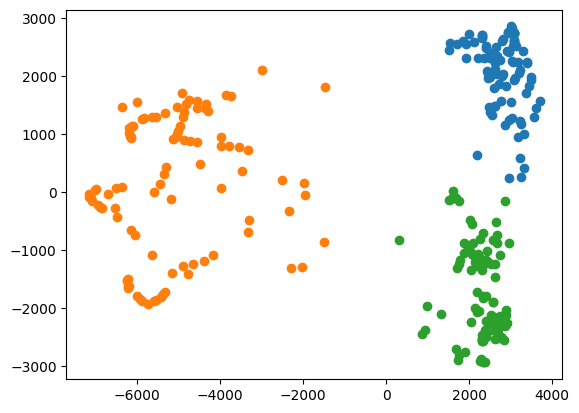

In [24]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])